In [4]:
import numpy as np
import pandas as pd
import multiprocessing

import matplotlib.pyplot as plt
import bokeh
import bokeh.io
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

# init_notebook_mode()

import seaborn as sns

import re
import math
import copy

from collections import defaultdict
import csv
import itertools
import datetime 
from datetime import datetime
import time
import dateutil.parser
import pickle
import random

import gc
import zipfile
import sys, getopt
import os

from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

import dask.dataframe as dd
#from chest import Chest

InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last"

# Magic function to make matplotlib inline
%matplotlib inline

%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

import dask.dataframe as ddf
import dask.array as da

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 800)

Loading BokehJS ...

In [ ]:
from scipy import integrate

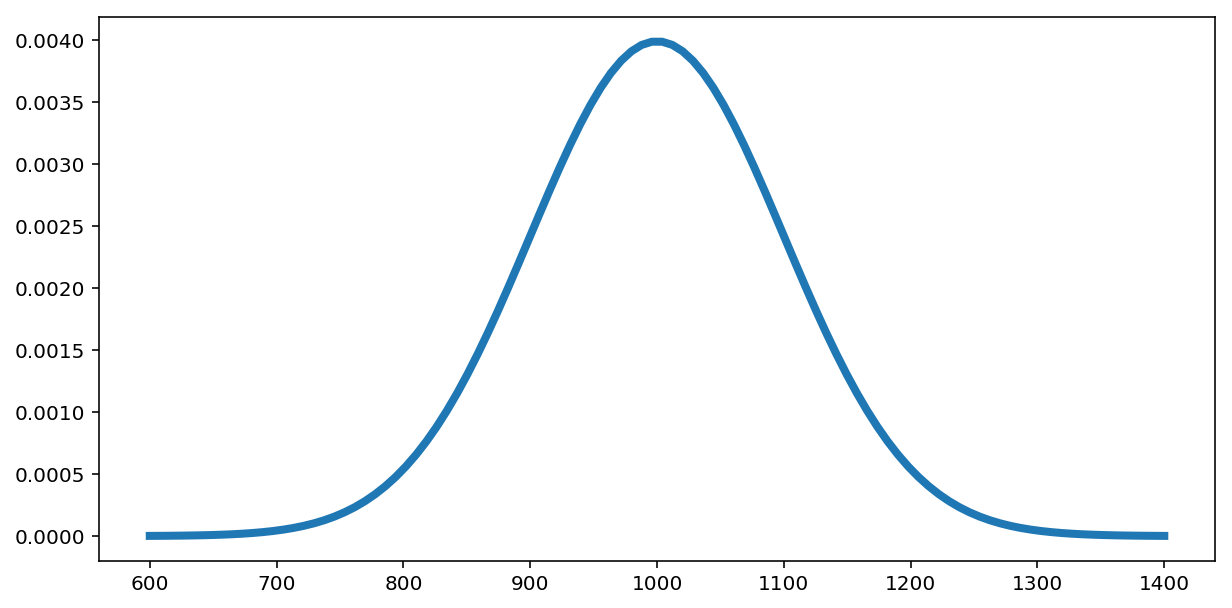

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.rcParams["figure.figsize"] = [10, 5]

mu = 1000
# variance = 1
sigma = 100 # math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 4)

In [62]:
integrate.quad(stats.norm.pdf, 750, 1250, args = (1000, 125))

(0.9544997361036415, 1.8403539433314893e-11)

In [2]:
# Normal(mu, sigma) pdf
f = lambda x, mu, sigma: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

In [15]:
# Loss given: demand, buy, margin, cost
def L(d, b, margin, cost):
    if d > b:
        return (d - b)*margin
    elif d < b:
        return (b - d)*cost
    elif d == b:
        return 0
    else:
        print('Error')

In [24]:
# mu_0: we think demand will be N(mu_0, sigma_0)
# For article with cost = cost_0, margin = margin_0

# Expected value of Loss function, given: 
    # buy, demand prediction distribution, margin and cost
    
def EL(b_0, mu_0, sigma_0, margin_0, cost_0):
    I = lambda x: L(x, b_0, margin_0, cost_0) * f(x, mu_0, sigma_0)
    return round(integrate.quad(I, 0, 50000)[0], 2) # integrate over x (demand) ranging from 0 to 50000

In [25]:
EL(200, 150, 25, 10, 2)

102.55

In [81]:
# Suppose:
# We predict article demand will be 1000, but with low confidence (sigma = 100), 
mu_0 = 1000
sigma_0 = 100

# ...where the article has margin = 80, cost = 20
margin_0 = 80
cost_0 = 20

# Calculate E[L] for as low as buying 500 units; as high as buying 2500 units
lb = 800
ub = 1400

b = range(lb, ub, 1) # low: buy 500 units; high: buy 2500 units
ELs = pd.DataFrame([EL(b, mu_0, margin_0, sigma_0, cost_0) for b in range(lb, ub, 1)])[0] # Expected loss for 

l = pd.DataFrame({'buy': b, 'ExpectLoss': ELs})

In [45]:
l.head()

,buy,ExpectLoss
0,500,60000.0
1,501,59880.0
2,502,59760.0
3,503,59640.0
4,504,59520.0


Text(0.5, 1.0, 'Expected Loss vs. Buy Quantity')

Text(0.5, 0, 'Buy Quantity')

Text(0, 0.5, 'Expected Loss')

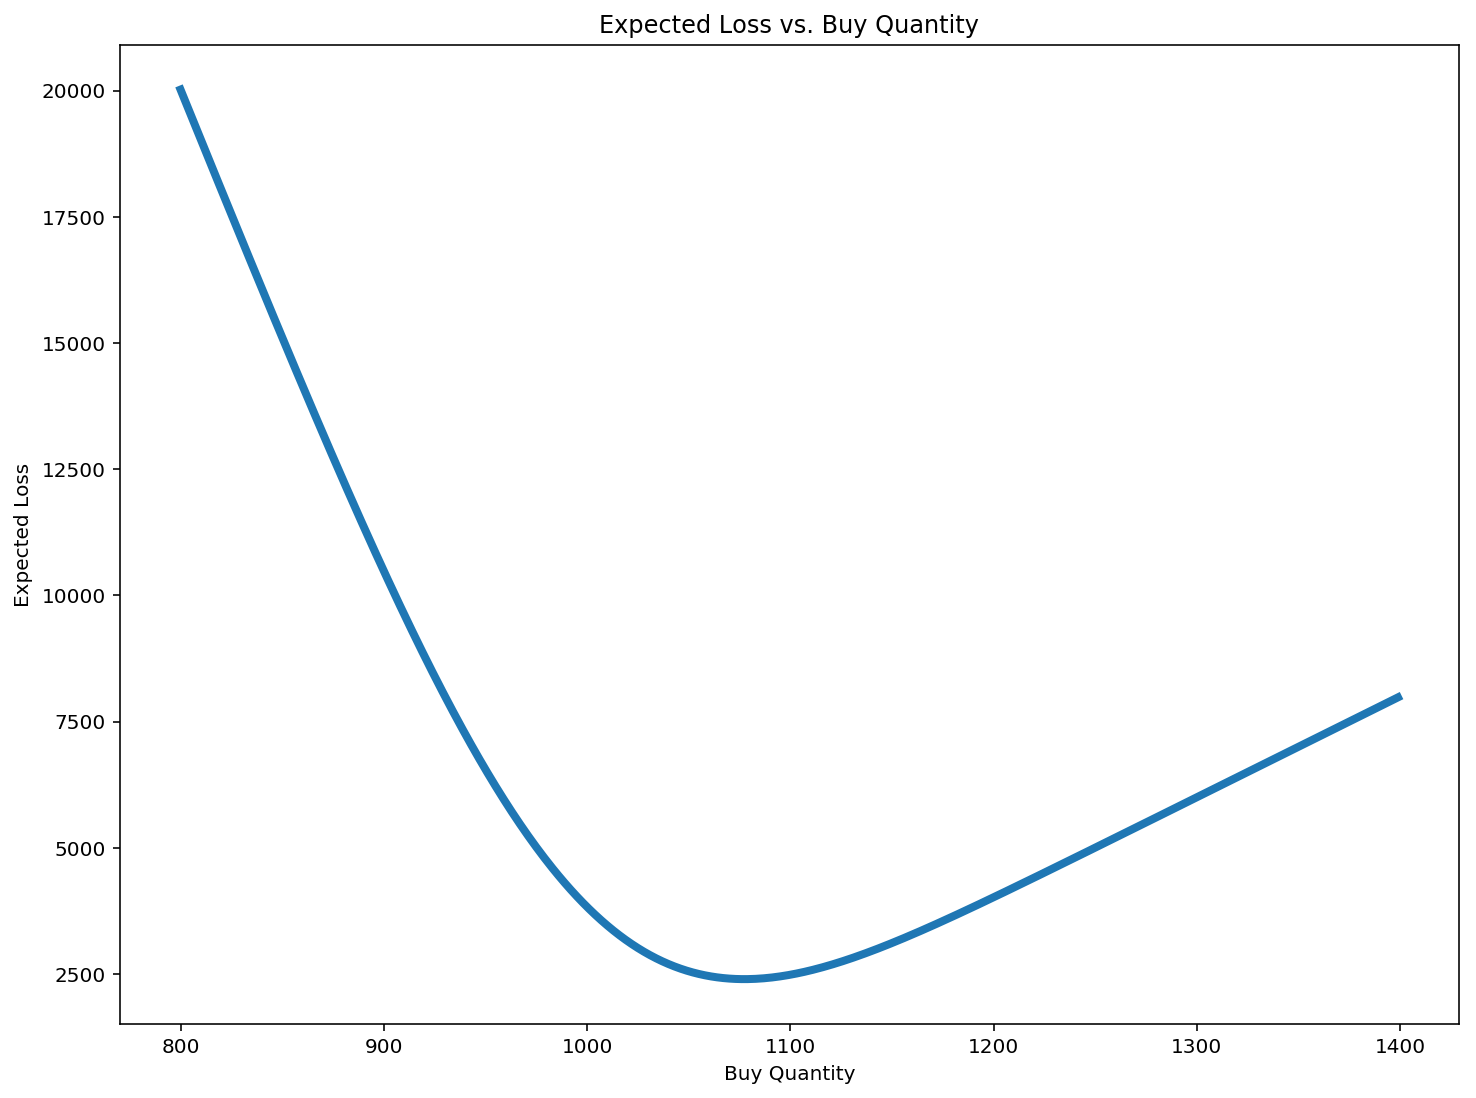

In [82]:
plt.rcParams["figure.figsize"] = [12,9]
plt.plot(l['buy'], l['ExpectLoss'], linewidth = 4)

plt.title('Expected Loss vs. Buy Quantity')
plt.xlabel('Buy Quantity')
plt.ylabel('Expected Loss')

In [80]:
l[l.ExpectLoss == l.ExpectLoss.min()]

L(1000, 1077, 80, 20)



,buy,ExpectLoss
377,1077,2398.6


1540